In [ ]:
#import necessary libraries for battery data analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('battery_log.csv')         # Load the battery log data
print(df.head())                            # Display the first few rows of the data

   Time  Voltage  Current  Temperature
0     0     4.20      0.0         25.0
1    10     4.18      2.0         25.5
2    20     4.15      2.0         26.1
3    30     4.12      2.0         26.8
4    40     4.08      2.0         27.5


In [36]:
print(df.describe().round(2))           # Show summary statistics for the data

         Time  Voltage  Current  Temperature
count   11.00    11.00    11.00        11.00
mean    50.00     3.86     2.59        28.38
std     33.17     0.40     2.06         2.40
min      0.00     3.00     0.00        25.00
25%     25.00     3.78     1.25        26.45
50%     50.00     4.00     2.00        28.20
75%     75.00     4.14     5.00        30.50
max    100.00     4.20     5.00        32.00


In [ ]:
overheating_events = df[df['Temperature'] > 30]                         # Identify rows where temperature exceeds 30°C
print(f"Number of overheating events: {len(overheating_events)}")       # Print the count of overheating events
print(overheating_events[['Time', 'Temperature']])                      # Display the time and temperature of each overheating event

Number of overheating events: 4
    Time  Temperature
7     70         30.5
8     80         32.0
9     90         31.0
10   100         30.5


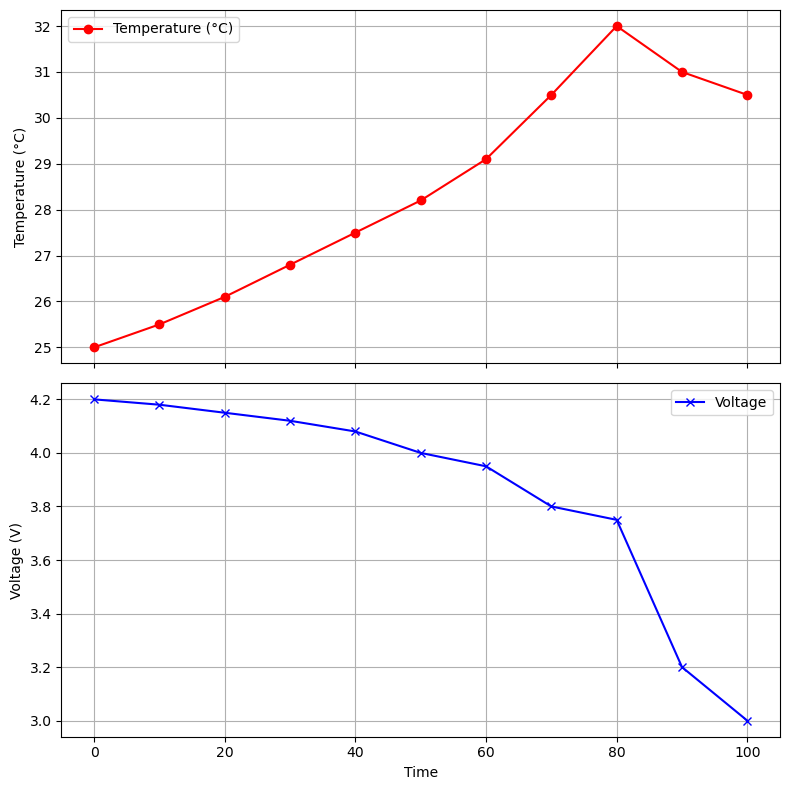

In [ ]:
# Plot temperature and voltage over time

# Create a figure with two subplots: one for temperature and one for voltage
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)       # Create two subplots stacked vertically, sharing the x-axis

# Plot temperature on the first subplot
ax1.plot(df['Time'], df['Temperature'], label='Temperature (°C)', color='red', marker='o')      # Plot temperature data with red circles
ax1.set_ylabel('Temperature (°C)')
ax1.legend()
ax1.grid()

# Plot voltage on the second subplot
ax2.plot(df['Time'], df['Voltage'], label='Voltage', color='blue', marker='x')      # Plot voltage data with blue crosses
ax2.set_xlabel('Time')
ax2.set_ylabel('Voltage (V)')
ax2.legend()
ax2.grid()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

    Time  Voltage  Current  Power_Watts
0      0     4.20      0.0         0.00
1     10     4.18      2.0         8.36
2     20     4.15      2.0         8.30
3     30     4.12      2.0         8.24
4     40     4.08      2.0         8.16
5     50     4.00      5.0        20.00
6     60     3.95      5.0        19.75
7     70     3.80      5.0        19.00
8     80     3.75      5.0        18.75
9     90     3.20      0.5         1.60
10   100     3.00      0.0         0.00


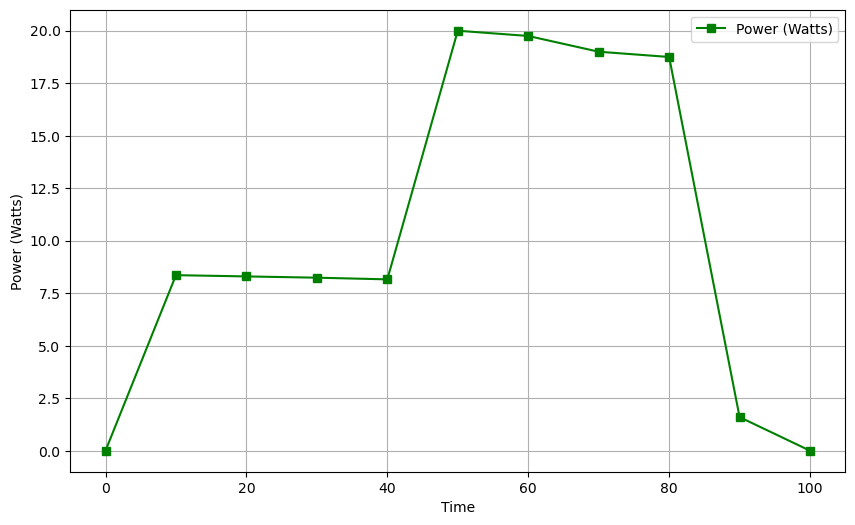

In [47]:
# Calculate power and plot it over time

df['Power_Watts'] = df['Voltage'] * df['Current']   # Calculate power in watts and add it as a new column to the DataFrame
print(df[['Time', 'Voltage', 'Current', 'Power_Watts']])

fig, ax = plt.subplots(figsize=(10, 6))       # Create a new figure for power plot
ax.plot(df['Time'], df['Power_Watts'], label='Power (Watts)', color='green', marker='s')      # Plot power data with green squares
ax.set_xlabel('Time')
ax.set_ylabel('Power (Watts)')
ax.legend()
plt.grid()
plt.show()

In [48]:
# Calculate total energy consumed in watt-hours (Wh)

total_energy_joules = df['Power_Watts'].mean() * df["Time"].max()       # Calculate total energy in joules using average power and total time
total_energy_wh = total_energy_joules / 3600                            # Convert energy from joules to watt-hours (1 Wh = 3600 J)

print(f"Total energy consumed: {total_energy_wh:.4f} Wh")

Total energy consumed: 0.2832 Wh


In [49]:
# Final summary of analysis results

print("--- End of analysis ---")
print(f"Max Power Drawn: {df['Power_Watts'].max():.2f} W")
print(f"Average Power Drawn: {df['Power_Watts'].mean():.2f} W")
print(f"Average Temperature: {df['Temperature'].mean():.2f} °C")
print(f"Total Energy Consumed: {total_energy_wh:.4f} Wh")
print("Analysis complete. Please review the results above.")

--- End of analysis ---
Max Power Drawn: 20.00 W
Average Power Drawn: 10.20 W
Average Temperature: 28.38 °C
Total Energy Consumed: 0.2832 Wh
Analysis complete. Please review the results above.
